**Задание 1**

Возьмите датасет Mortality and Water Hardness https://www.kaggle.com/ukveteran/mortality-and-water-hardness  
В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.  

Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

def get_rsquared(Y, Y_model):
    sum_smp = 0
    sum_mdl = 0
    Y_mean = Y.mean()
    resid = []
    for i in range(len(Y)):
        sum_smp += (Y[i] - Y_mean) ** 2
        sum_mdl += (Y[i] - Y_model[i]) ** 2
        resid.append(Y[i] - Y_model[i])
    return (1 - sum_mdl / sum_smp, resid)

def score(data):
    plt.scatter(data["hardness"], data["mortality"])
    plt.title("График жесткости воды и средней годовой смертности")
    plt.xlabel("Жесткость воды")
    plt.ylabel("Средняя годовая смертность")
    plt.show()
    pirson = data[["hardness", "mortality"]].corr(method="pearson")["hardness"]["mortality"]
    spearman = data[["hardness", "mortality"]].corr(method="spearman")["hardness"]["mortality"]
    print(f"Коэффициент корреляции Пирсона:  {pirson}.")
    print(f"Коэффициент корреляции Спирмана: {spearman}.")
    
    X = data[["hardness"]]
    Y = data["mortality"]

    model = LinearRegression()
    model.fit(X, Y)
    model.score(X, Y)
    Y_model = model.predict(X)
    rsquared, resid = get_rsquared(Y, Y_model)

    plt.scatter(X["hardness"], Y, label="Исходная")
    plt.plot(X["hardness"], Y_model, c="r", label="Линейная модель")
    plt.title("График жесткости воды и средней годовой смертности c линейной моделью")
    plt.xlabel("Жесткость воды")
    plt.ylabel("Средняя годовая смертность")
    plt.legend()
    plt.show()
    
    print("Расчет через sklearn")
    print(f"\tУравнение прямой        : y   = {model.coef_[0]} * x + {model.intercept_}.")
    print(f"\tКоэффициент детерминации: R^2 = {rsquared}.")

    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    
    print("Расчет через statmodels")
    print(f"\tУравнение прямой        : y   = {results.params[1]} * x + {results.params[0]}.")
    print(f"\tКоэффициент детерминации: R^2 = {results.rsquared}.")

    plt.scatter(X["hardness"], resid)
    plt.title("График остатков линейной модели")
    plt.xlabel("Жесткость воды")
    plt.ylabel("Остатки средней годовой смертности")
    plt.show()

print("Исходные данные")
water_all = pd.read_csv("water.csv", usecols=["location", "mortality", "hardness"])
water_all

Исходные данные


,location,mortality,hardness
0,South,1247,105
1,North,1668,17
2,South,1466,5
3,North,1800,14
4,North,1609,18
...,...,...,...
56,South,1527,60
57,South,1627,53
58,South,1486,122
59,South,1485,81


Расчет для всей территории


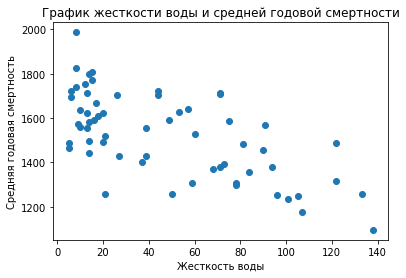

Коэффициент корреляции Пирсона:  -0.6548486232042464.
Коэффициент корреляции Спирмана: -0.6316646189166502.


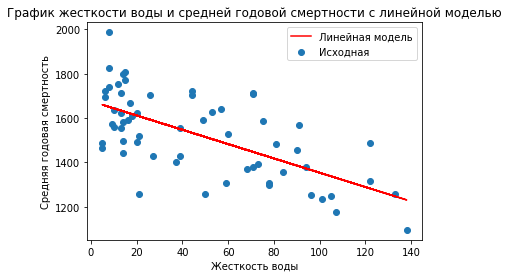

Расчет через sklearn
	Уравнение прямой        : y   = -3.226091606244149 * x + 1676.3556007011584.
	Коэффициент детерминации: R^2 = 0.4288267193124975.
Расчет через statmodels
	Уравнение прямой        : y   = -3.2260916062441534 * x + 1676.3556007011587.
	Коэффициент детерминации: R^2 = 0.42882671931249716.


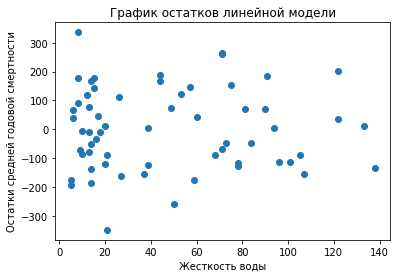

Выводы:
Оба коэффициента корреляции отрицательны, что говорит об обратной связи между величинами.
Угол наклона прямой (тупой угол), что также свидетельствует об обратной связи между величинами.
Остатки выглядят довольно хаотично, нет систематической составляющей и резких выбросов,
нет закономерности в чередовании знаков. Коэффициент детермиации положителен.
Можно считать, что модель подобрана правильно.

Итог: прослеживается обратная зависимость средней годовой смертности от жесткости воды.


In [2]:
print("Расчет для всей территории")
score(water_all)
print("Выводы:")
print("Оба коэффициента корреляции отрицательны, что говорит об обратной связи между величинами.")
print("Угол наклона прямой (тупой угол), что также свидетельствует об обратной связи между величинами.")
print("Остатки выглядят довольно хаотично, нет систематической составляющей и резких выбросов,")
print("нет закономерности в чередовании знаков. Коэффициент детермиации положителен.")
print("Можно считать, что модель подобрана правильно.")
print("\nИтог: прослеживается обратная зависимость средней годовой смертности от жесткости воды.")

**Задание 2**

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

Расчет для юга


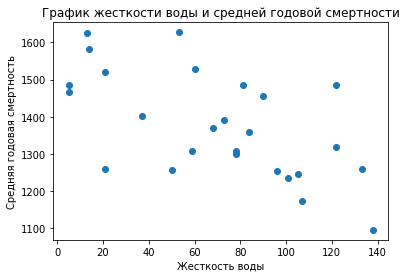

Коэффициент корреляции Пирсона:  -0.6021532715484159.
Коэффициент корреляции Спирмана: -0.5957229185013566.


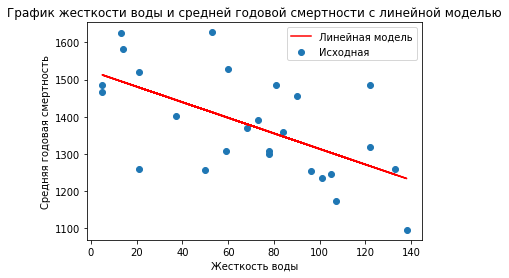

Расчет через sklearn
	Уравнение прямой        : y   = -2.0927184466019417 * x + 1522.8150485436895.
	Коэффициент детерминации: R^2 = 0.3625885624364601.
Расчет через statmodels
	Уравнение прямой        : y   = -2.0927184466019435 * x + 1522.815048543689.
	Коэффициент детерминации: R^2 = 0.36258856243646.


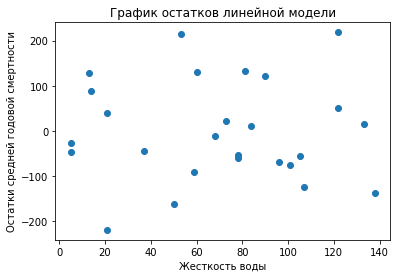

In [3]:
print("Расчет для юга")
score(water_all[water_all["location"] == "South"].reset_index()[["mortality", "hardness"]])

Расчет для севера


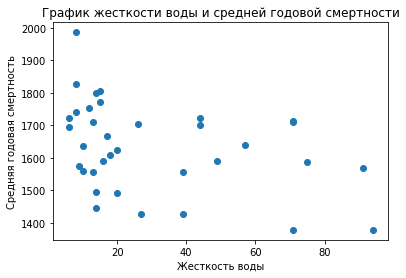

Коэффициент корреляции Пирсона:  -0.36859783832887183.
Коэффициент корреляции Спирмана: -0.4042078956511175.


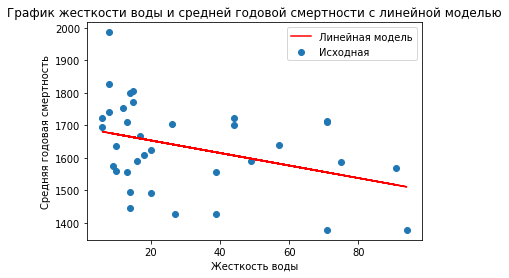

Расчет через sklearn
	Уравнение прямой        : y   = -1.9313421524045753 * x + 1692.312801433099.
	Коэффициент детерминации: R^2 = 0.1358643664207173.
Расчет через statmodels
	Уравнение прямой        : y   = -1.9313421524045775 * x + 1692.3128014330987.
	Коэффициент детерминации: R^2 = 0.13586436642071753.


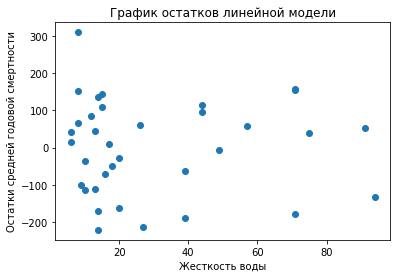

Выводы:
Оба коэффициента корреляции для юга и севера отрицательны, что говорит об обратной связи между величинами.
Однако по модулю значения коэффициентов для севера меньше, что говорит о менее сильной зависимости.
Аналогичная ситуация и с уголом наклона прямой - тупой угол, и в случае севером прямая ближе к горизонтальной.
Иными словами, по виду прямой можно сказать, что связь есть, но для севера она менее выражена.
Для севера и юга остатки выглядят довольно хаотично, нет систематической составляющей и резких выбросов,
нет закономерности в чередовании знаков. Коэффициент детермиации положителен, хотя для севера меньше, чем для юга.
Можно считать, что модель подобрана правильно.

Итог: зависимость, найденная для всех городов в целом, прослеживается как для юга, так и для севера в отдельности.
Однако для севера она менее выражена.


In [4]:
print("Расчет для севера")
score(water_all[water_all["location"] == "North"].reset_index()[["mortality", "hardness"]])
print("Выводы:")
print("Оба коэффициента корреляции для юга и севера отрицательны, что говорит об обратной связи между величинами.")
print("Однако по модулю значения коэффициентов для севера меньше, что говорит о менее сильной зависимости.")
print("Аналогичная ситуация и с уголом наклона прямой - тупой угол, и в случае севером прямая ближе к горизонтальной.")
print("Иными словами, по виду прямой можно сказать, что связь есть, но для севера она менее выражена.")
print("Для севера и юга остатки выглядят довольно хаотично, нет систематической составляющей и резких выбросов,")
print("нет закономерности в чередовании знаков. Коэффициент детермиации положителен, хотя для севера меньше, чем для юга.")
print("Можно считать, что модель подобрана правильно.")
print("\nИтог: зависимость, найденная для всех городов в целом, прослеживается как для юга, так и для севера в отдельности.")
print("Однако для севера она менее выражена.")